**1. Run SVM on loan dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan_df = pd.read_excel('loan.xlsx')

In [3]:
loan_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


**Exploratory analysis on the loan dataset**

In [4]:
loan_df.shape

(429, 14)

In [5]:
loan_df['Decision'].value_counts()

reject    237
accept    192
Name: Decision, dtype: int64

In [6]:
print('Percentage distribution')
loan_df['Decision'].value_counts()/float(len(loan_df))

Percentage distribution


reject    0.552448
accept    0.447552
Name: Decision, dtype: float64

<AxesSubplot:xlabel='Decision', ylabel='count'>

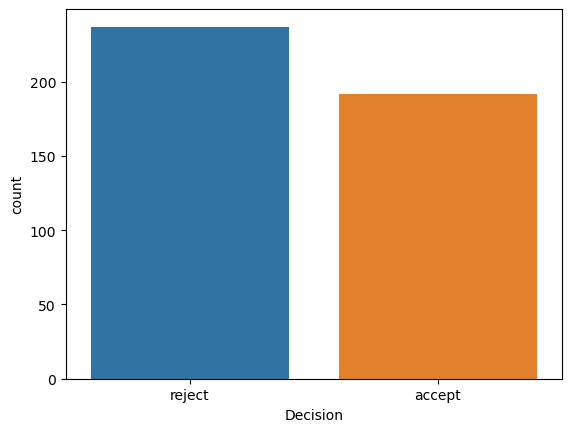

In [7]:
sns.countplot(x='Decision', data=loan_df)

In [8]:
loan_df.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

**Performing correlation analysis on the numerical and categorical columns**

In [9]:
loan_df_copy = loan_df.copy()
numerical_cols = loan_df_copy[['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn', 'Balance']]
categorical_cols = loan_df_copy.drop(columns=['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn', 'Balance'])

#Performing one hot encoding to get the categorical columns to respective continuous values.

#Column Name: Sex
Sex = pd.get_dummies(loan_df_copy['Sex'], drop_first=True, prefix='sex')
#Column Name: Res_status
Res_status = pd.get_dummies(loan_df_copy['Res_status'], drop_first=True, prefix='res_status')
#Column Name: Telephone
Telephone = pd.get_dummies(loan_df_copy['Telephone'], drop_first=True, prefix='telephone')
#Column Name: Occupation
Occupation = pd.get_dummies(loan_df_copy['Occupation'], drop_first=True, prefix='occupation')
#Column Name:Job_status
Job_status = pd.get_dummies(loan_df_copy['Job_status'], drop_first=True, prefix='job_status')
#Column Name: Liab_ref
Liab_ref = pd.get_dummies(loan_df_copy['Liab_ref'], drop_first=True, prefix='liab_ref')
#Column Name: Acc_ref
Acc_ref = pd.get_dummies(loan_df_copy['Acc_ref'], drop_first=True, prefix='acc_ref')
#Column Name: Decision
Decision =  pd.get_dummies(loan_df_copy['Decision'], drop_first=True, prefix='decision')


loan_df_copy.drop(['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status', 'Liab_ref', 'Acc_ref', 'Decision'],
                axis=1, inplace=True)

loan_df_copy = pd.concat([loan_df_copy, Sex, Res_status, Telephone, Occupation, Job_status, Liab_ref, Acc_ref, Decision],
                       axis=1)

loan_df_copy.columns

loan_df_copy.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,sex_M,res_status_rent,telephone_not_given,occupation_driver,...,occupation_unemploye,job_status_military,job_status_private_s,job_status_retired,job_status_self_empl,job_status_student,job_status_unemploye,liab_ref_t,acc_ref_oth_inst_,decision_reject
0,50.750000,0.585,0,0,145,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,19.670000,10.000,0,0,140,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
2,52.830002,15.000,5,14,0,2200,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,22.670000,2.540,2,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,29.250000,13.000,0,0,228,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [10]:
loan_df_copy_reject = loan_df_copy[loan_df_copy.decision_reject == 1]
loan_df_copy_accept = loan_df_copy[loan_df_copy.decision_reject == 0]

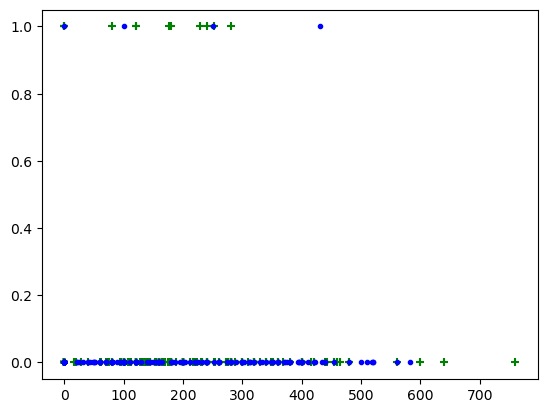

In [11]:
plt.scatter(loan_df_copy_reject['Home_Expn'], loan_df_copy_reject['occupation_driver'], color="green", marker='+')
plt.scatter(loan_df_copy_accept['Home_Expn'], loan_df_copy_accept['occupation_driver'], color="blue", marker='.')

**Correlation plot between the columns in the dataframe**

<AxesSubplot:>

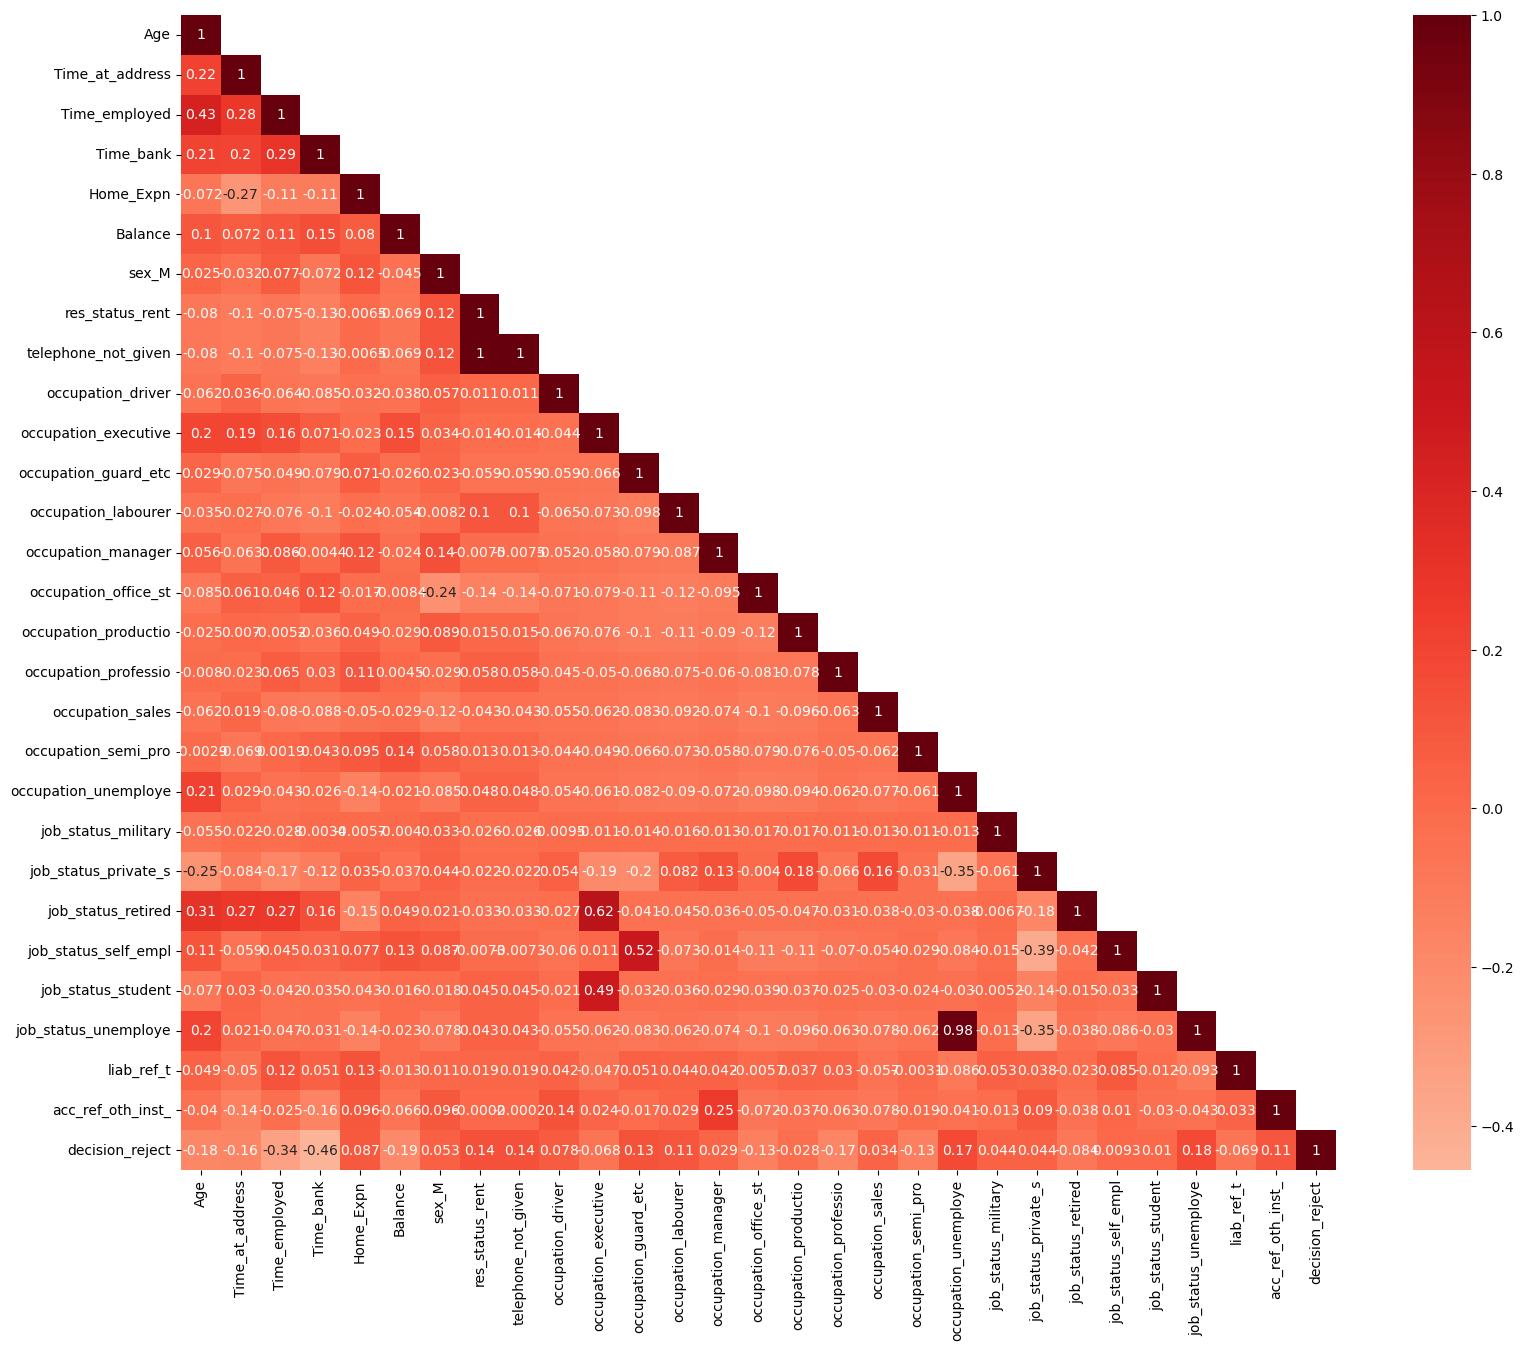

In [12]:
plt.figure(figsize=(20, 15))

mask_upper_triangle = np.triu(np.ones_like(loan_df_copy.corr(), dtype=bool), k=1)

sns.heatmap(loan_df_copy.corr(), cmap="Reds", annot=True, mask=mask_upper_triangle,
            square=True, center = 0 )

**Splitting the dataset into train and test data**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = loan_df_copy.drop(columns='decision_reject')
y = loan_df_copy['decision_reject']

x_cols = X.columns

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.fit_transform(X_test, y_test)

X_train = pd.DataFrame(X_train, columns=[x_cols])
X_test = pd.DataFrame(X_test, columns=x_cols)

In [17]:
X_train.head()
X_test.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,sex_M,res_status_rent,telephone_not_given,occupation_driver,...,occupation_semi_pro,occupation_unemploye,job_status_military,job_status_private_s,job_status_retired,job_status_self_empl,job_status_student,job_status_unemploye,liab_ref_t,acc_ref_oth_inst_
0,-0.873693,0.157446,-0.551360,-0.259908,-0.197313,-0.395075,0.670402,-0.622171,-0.622171,-0.220863,...,-0.200805,-0.30532,0.0,0.757080,-0.125491,-0.257130,0.0,-0.30532,-0.848528,-0.289886
1,0.912129,0.083903,0.352777,-0.546472,-0.968628,0.699634,0.670402,1.607275,1.607275,-0.220863,...,-0.200805,-0.30532,0.0,0.757080,-0.125491,-0.257130,0.0,-0.30532,1.178511,-0.289886
2,0.836868,-0.536798,-0.551360,-0.546472,-0.197313,-0.395075,0.670402,-0.622171,-0.622171,-0.220863,...,-0.200805,-0.30532,0.0,0.757080,-0.125491,-0.257130,0.0,-0.30532,-0.848528,-0.289886
3,-1.085571,0.198630,-0.551360,-0.546472,-0.768658,-0.395075,0.670402,-0.622171,-0.622171,-0.220863,...,-0.200805,-0.30532,0.0,0.757080,-0.125491,-0.257130,0.0,-0.30532,-0.848528,-0.289886
4,0.257682,-0.087696,1.859671,1.459481,0.052650,-0.395075,0.670402,1.607275,1.607275,-0.220863,...,-0.200805,-0.30532,0.0,-1.320864,-0.125491,3.889087,0.0,-0.30532,1.178511,-0.289886


**Executing SVM with default hyperparameters -> C=1.0, kernel='rbf' and gamma='auto'**

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train.values, y_train.values)

y_predicted = svc_model.predict(X_test.values)

print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predicted)))
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy score: 0.7442
[[35 22]
 [11 61]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        57
           1       0.73      0.85      0.79        72

    accuracy                           0.74       129
   macro avg       0.75      0.73      0.73       129
weighted avg       0.75      0.74      0.74       129



**The accuracy score is 74.44%**

In [19]:
# svc = SVC()
# svc.fit(X_train.drop(columns=['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Balance','liab_ref_t'], axis=1),
#         y_train.drop(columns=['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Balance','liab_ref_t'], axis=1))

# y_predicted = svc.predict(X_test.drop(columns=['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Balance','liab_ref_t'], axis=1))

# print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predicted)))

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [22]:
grid = GridSearchCV(SVC(), param_grid, verbose=3) #default kernel is 'rbf' in SVC constructor

In [23]:
grid.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.550 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.550 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.550 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.550 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.550 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.550 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.550 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.550 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.550 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.550 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.550 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 4/5] END ...................C=1000, gamma=1;, score=0.583 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.567 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.733 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.667 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.650 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.700 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.683 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.717 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.750 total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [24]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [25]:
grid_predictions = grid.predict(X_test.values)

In [26]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[32 25]
 [ 7 65]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        57
           1       0.72      0.90      0.80        72

    accuracy                           0.75       129
   macro avg       0.77      0.73      0.73       129
weighted avg       0.77      0.75      0.74       129



In [27]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train.values, y_train.values)

y_predicted = svc_model.predict(X_test.values)

print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predicted)))
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy score: 0.7442
[[36 21]
 [12 60]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        57
           1       0.74      0.83      0.78        72

    accuracy                           0.74       129
   macro avg       0.75      0.73      0.74       129
weighted avg       0.74      0.74      0.74       129



In [28]:
grid = GridSearchCV(SVC(kernel='linear'), param_grid, verbose=3)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.767 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.817 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.717 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.850 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.767 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.817 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.717 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.767 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 2/5] END ......................C=1, gamma=1;, score=0.783 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.700 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.700 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.767 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.817 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.783 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.700 total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.700 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.767 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.817 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;, score=0.783 total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.01;, score=0.700 total time=   0.0s
[CV 4/5] END ...............

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 5/5] END ...................C=1, gamma=0.01;, score=0.767 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.817 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;, score=0.783 total time=   0.0s
[CV 3/5] END ..................C=1, gamma=0.001;, score=0.700 total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END ..................C=1, gamma=0.001;, score=0.767 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.817 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.783 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 3/5] END .................C=1, gamma=0.0001;, score=0.700 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.767 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.833 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 2/5] END .....................C=10, gamma=1;, score=0.800 total time=   0.0s
[CV 3/5] END .....................C=10, gamma=1;, score=0.700 total time=   0.0s
[CV 4/5] END .....................C=10, gamma=1;, score=0.700 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 5/5] END .....................C=10, gamma=1;, score=0.767 total time=   0.0s
[CV 1/5] END ...................C=10, gamma=0.1;, score=0.833 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 2/5] END ...................C=10, gamma=0.1;, score=0.800 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.1;, score=0.700 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.700 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.767 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 1/5] END ..................C=10, gamma=0.01;, score=0.833 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.800 total time=   0.1s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.700 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 4/5] END ..................C=10, gamma=0.01;, score=0.700 total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.767 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.001;, score=0.833 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 2/5] END .................C=10, gamma=0.001;, score=0.800 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.001;, score=0.700 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.001;, score=0.767 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 1/5] END ................C=10, gamma=0.0001;, score=0.833 total time=   0.0s
[CV 2/5] END ................C=10, gamma=0.0001;, score=0.800 total time=   0.0s
[CV 3/5] END ................C=10, gamma=0.0001;, score=0.700 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ................C=10, gamma=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END ................C=10, gamma=0.0001;, score=0.767 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ....................C=100, gamma=1;, score=0.833 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ....................C=100, gamma=1;, score=0.800 total time=   0.6s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ....................C=100, gamma=1;, score=0.700 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ....................C=100, gamma=1;, score=0.717 total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END ....................C=100, gamma=1;, score=0.767 total time=   1.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ..................C=100, gamma=0.1;, score=0.833 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ..................C=100, gamma=0.1;, score=0.800 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ..................C=100, gamma=0.1;, score=0.700 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ..................C=100, gamma=0.1;, score=0.717 total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END ..................C=100, gamma=0.1;, score=0.767 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END .................C=100, gamma=0.01;, score=0.833 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END .................C=100, gamma=0.01;, score=0.800 total time=   0.6s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END .................C=100, gamma=0.01;, score=0.700 total time=   0.8s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END .................C=100, gamma=0.01;, score=0.717 total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END .................C=100, gamma=0.01;, score=0.767 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ................C=100, gamma=0.001;, score=0.833 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ................C=100, gamma=0.001;, score=0.800 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ................C=100, gamma=0.001;, score=0.700 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ................C=100, gamma=0.001;, score=0.717 total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END ................C=100, gamma=0.001;, score=0.767 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.833 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.800 total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.700 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ...............C=100, gamma=0.0001;, score=0.717 total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END ...............C=100, gamma=0.0001;, score=0.767 total time=   0.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ...................C=1000, gamma=1;, score=0.833 total time=   4.7s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ...................C=1000, gamma=1;, score=0.800 total time=   5.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ...................C=1000, gamma=1;, score=0.700 total time=   6.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ...................C=1000, gamma=1;, score=0.717 total time=   4.3s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END ...................C=1000, gamma=1;, score=0.767 total time=  16.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END .................C=1000, gamma=0.1;, score=0.833 total time=   4.8s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END .................C=1000, gamma=0.1;, score=0.800 total time=   5.1s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END .................C=1000, gamma=0.1;, score=0.700 total time=   6.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END .................C=1000, gamma=0.1;, score=0.717 total time=   4.3s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END .................C=1000, gamma=0.1;, score=0.767 total time=  16.2s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ................C=1000, gamma=0.01;, score=0.833 total time=   4.7s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ................C=1000, gamma=0.01;, score=0.800 total time=   5.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ................C=1000, gamma=0.01;, score=0.700 total time=   6.8s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ................C=1000, gamma=0.01;, score=0.717 total time=   4.3s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END ................C=1000, gamma=0.01;, score=0.767 total time=  17.1s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.833 total time=   4.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.800 total time=   5.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.700 total time=   7.5s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.717 total time=   4.4s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.767 total time=  16.3s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.833 total time=   4.8s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.800 total time=   5.1s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.700 total time=   6.9s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.717 total time=   4.4s
[CV 5/5] END ..............C=1000, gamma=0.0001;, score=0.767 total time=  16.3s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [30]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

**Best hyperparameter for SVM linear kernel are C=0.1 and gamma=1 as per GridSearchCV**

In [31]:
svc_linear = SVC(kernel='linear', C=0.1, gamma=1)

In [32]:
svc_linear.fit(X_train.values, y_train.values)

SVC(C=0.1, gamma=1, kernel='linear')

In [33]:
svc_linear_predict = svc_linear.predict(X_test.values)

In [34]:
print(confusion_matrix(y_test, svc_linear_predict))
print(classification_report(y_test, svc_linear_predict))

[[36 21]
 [12 60]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        57
           1       0.74      0.83      0.78        72

    accuracy                           0.74       129
   macro avg       0.75      0.73      0.74       129
weighted avg       0.74      0.74      0.74       129



**For Linear SVM kernel we got 74% accuracy with parameters C=0.1 and gamma=1**

In [35]:
grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid, verbose=3)

In [36]:
grid.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.767 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.683 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.717 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.600 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.767 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.733 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.717 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.683 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.550 total time=   0.0s


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.550 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.567 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.550 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.550 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.550 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.550 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.550 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.550 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.550 total time=   0.0s
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 4/5] END ...............

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 1/5] END ......................C=1, gamma=1;, score=0.650 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.617 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.667 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.583 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.800 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.733 total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.683 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.783 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.783 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;, score=0.783 total time=   0.0s
[CV 3/5] END ...............

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 3/5] END ..................C=1, gamma=0.001;, score=0.567 total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.001;, score=0.550 total time=   0.0s
[CV 5/5] END ..................C=1, gamma=0.001;, score=0.550 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.683 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;, score=0.617 total time=   0.0s
[CV 3/5] END .....................C=10, gamma=1;, score=0.683 total time=   0.0s
[CV 4/5] END .....................C=10, gamma=1;, score=0.617 total time=   0.0s
[CV 5/5] END ...............

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 1/5] END ..................C=10, gamma=0.01;, score=0.800 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.817 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.700 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.700 total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.850 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.001;, score=0.783 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.001;, score=0.783 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.001;, score=0.717 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.001;, score=0.767 total time=   0.0s
[CV 1/5] END ................C=10, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 2/5] END ................C=10, gamma=0.0001;, score=0.550 total time=   0.0s
[CV 3/5] END ...............

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 3/5] END ....................C=100, gamma=1;, score=0.633 total time=   0.0s
[CV 4/5] END ....................C=100, gamma=1;, score=0.533 total time=   0.0s
[CV 5/5] END ....................C=100, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=100, gamma=0.1;, score=0.733 total time=   0.0s
[CV 2/5] END ..................C=100, gamma=0.1;, score=0.667 total time=   0.0s
[CV 3/5] END ..................C=100, gamma=0.1;, score=0.767 total time=   0.0s
[CV 4/5] END ..................C=100, gamma=0.1;, score=0.700 total time=   0.0s
[CV 5/5] END ..................C=100, gamma=0.1;, score=0.700 total time=   0.0s
[CV 1/5] END .................C=100, gamma=0.01;, score=0.783 total time=   0.0s
[CV 2/5] END .................C=100, gamma=0.01;, score=0.767 total time=   0.0s
[CV 3/5] END .................C=100, gamma=0.01;, score=0.683 total time=   0.0s
[CV 4/5] END .................C=100, gamma=0.01;, score=0.667 total time=   0.0s
[CV 5/5] END ...............

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 5/5] END ................C=100, gamma=0.001;, score=0.833 total time=   0.0s
[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.783 total time=   0.0s
[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.783 total time=   0.0s
[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.717 total time=   0.0s
[CV 4/5] END ...............C=100, gamma=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END ...............C=100, gamma=0.0001;, score=0.767 total time=   0.0s
[CV 1/5] END ...................C=1000, gamma=1;, score=0.650 total time=   0.0s
[CV 2/5] END ...................C=1000, gamma=1;, score=0.583 total time=   0.0s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.633 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.533 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.700 total time=   0.0s
[CV 2/5] END ...............

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names on

[CV 2/5] END ................C=1000, gamma=0.01;, score=0.783 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.767 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.683 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.733 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.817 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.783 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.717 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.683 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.783 total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.767 total time=   0.0s
[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.817 total time=   0.0s
[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.700 total time=   0.0s
[CV 4/5] END ..............C

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [37]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [38]:
svc_poly = SVC(kernel='poly', C=0.1, gamma=1, degree=3)

In [39]:
svc_poly.fit(X_train.values, y_train.values)

SVC(C=0.1, gamma=1, kernel='poly')

In [40]:
svc_poly_predict = svc_poly.predict(X_test.values)

In [41]:
print(confusion_matrix(y_test, svc_poly_predict))
print(classification_report(y_test, svc_poly_predict))

[[37 20]
 [12 60]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        57
           1       0.75      0.83      0.79        72

    accuracy                           0.75       129
   macro avg       0.75      0.74      0.74       129
weighted avg       0.75      0.75      0.75       129



**We are getting an accuracy of 75% with polynomial kernel, with parameters degree = 3, C=0.1, gamma=0.1**

In [42]:
svc_poly = SVC(kernel='poly', C=0.1, gamma=0.1, degree=4) #polynomial kernel with degree 4

In [43]:
svc_poly.fit(X_train.values, y_train.values)

SVC(C=0.1, degree=4, gamma=0.1, kernel='poly')

In [44]:
svc_poly_predict = svc_poly.predict(X_test.values)

In [45]:
print(confusion_matrix(y_test, svc_poly_predict))
print(classification_report(y_test, svc_poly_predict))

[[25 32]
 [ 6 66]]
              precision    recall  f1-score   support

           0       0.81      0.44      0.57        57
           1       0.67      0.92      0.78        72

    accuracy                           0.71       129
   macro avg       0.74      0.68      0.67       129
weighted avg       0.73      0.71      0.68       129



**We are getting an accuracy of 71% with polynomial kernel, with parameters degree = 4, C=0.1, gamma=0.1**

In [46]:
svc_poly = SVC(kernel='poly', C=0.1, gamma=0.1, degree=5) #polynomial kernel with degree 5

In [47]:
svc_poly.fit(X_train.values, y_train.values)

SVC(C=0.1, degree=5, gamma=0.1, kernel='poly')

In [48]:
svc_poly_predict = svc_poly.predict(X_test.values)

In [49]:
print(confusion_matrix(y_test, svc_poly_predict))
print(classification_report(y_test, svc_poly_predict))

[[26 31]
 [ 7 65]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        57
           1       0.68      0.90      0.77        72

    accuracy                           0.71       129
   macro avg       0.73      0.68      0.68       129
weighted avg       0.73      0.71      0.69       129



**We are getting an accuracy of 71% with polynomial kernel, with parameters degree = 5, C=0.1, gamma=0.1**

In [50]:
svc_sigmoid = SVC(kernel='sigmoid', C=10, gamma=0.01)
svc_sigmoid.fit(X_train.values, y_train.values)
svc_sigmoid_predict = svc_sigmoid.predict(X_test.values)
print(classification_report(y_test, svc_sigmoid_predict))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        57
           1       0.76      0.88      0.81        72

    accuracy                           0.78       129
   macro avg       0.78      0.76      0.77       129
weighted avg       0.78      0.78      0.77       129



**We are getting an accuracy of 78% with polynomial kernel, with parameters C=10, gamma=0.01**

**2. Convert the R code**

200
200
300 300


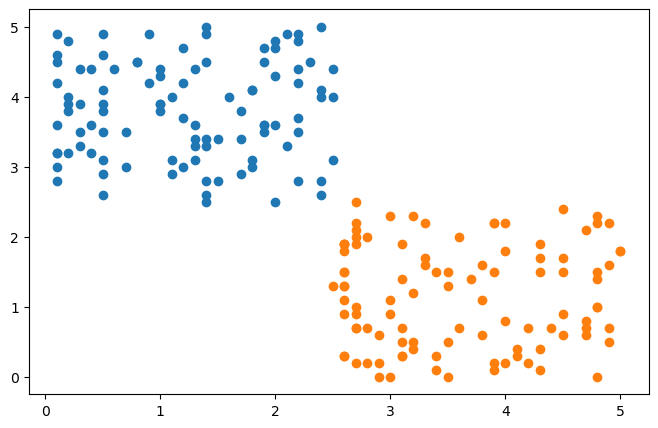

In [51]:
import random

size = 200

X = []
y = []
z = []

for i in range(0, int(size / 2)):
    X.append(np.round(random.uniform(0, 2.5), 1))
    y.append(np.round(random.uniform(2.5, 5), 1))
    z.append(int(X[i] > y[i]))
    
for i in range(int(size / 2), size):
    X.append(np.round(random.uniform(2.5, 5), 1))
    y.append(np.round(random.uniform(0, 2.5), 1))
    z.append(int(X[i] > y[i]))
    
df_x = pd.DataFrame(X)
print(df_x.size)
df_y = pd.DataFrame(y)
print(df_y.size)
df_label = pd.DataFrame(z)

df = pd.concat([df_x, df_y], ignore_index=True, axis=1)
df = pd.concat([df, df_label], ignore_index=True, axis=1)

df.columns = ['X', 'y', 'target']

df_0 = df[df.target==0]
df_1 = df[df.target==1]

print(df_0.size, df_1.size)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_0.X, df_0.y)    
ax.scatter(df_1.X, df_1.y)    

In [52]:
X = df[['X', 'y']]
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
2_svc = SVC(kernel='linear') #instance of SVM classifier with default value of C as 1.0

In [54]:
2_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [55]:
svc_predict = 2_svc.predict(X_test)

In [56]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



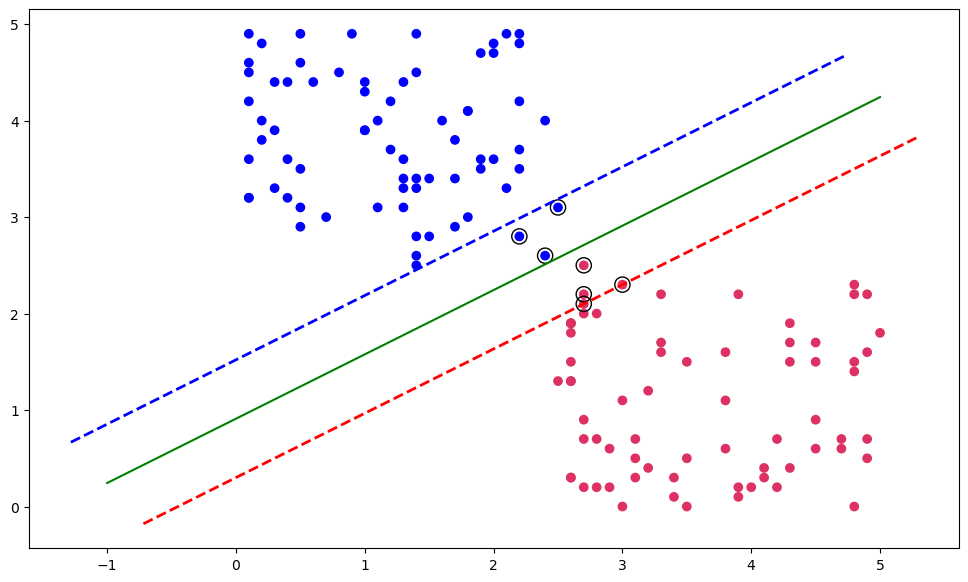

In [57]:
fig, ax = plt.subplots(figsize=(12, 7))

# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#DE3163', '#0000FF')

ax.scatter(X_train['X'], X_train['y'], c=colors)
for vector in 2_svc.support_vectors_:
    ax.scatter(x=vector[0], y=vector[1], s=120, linewidth=1, facecolors='none', edgecolors='k')
w = 2_svc.coef_
b = 2_svc.intercept_

x = np.linspace(-1,5, size)
y = -(w[0][0] / w[0][1])*x - b[0]/w[0][1]

ax.plot(x, y, color='green')

#plotting the margins
w_hat = w[0] / np.sqrt(np.sum(w[0] ** 2))

margin = 1 / np.sqrt(np.sum(w[0] ** 2))

decision_boundary_points = np.array(list(zip(x, y)))
points_above_plane = decision_boundary_points + w_hat * margin
points_below_plane = decision_boundary_points - w_hat * margin

plt.plot(points_above_plane[:, 0], 
         points_above_plane[:, 1], 
         'r--', 
         linewidth=2)

plt.plot(points_below_plane[:, 0], 
         points_below_plane[:, 1], 
         'b--',
         linewidth=2)

In [58]:
2_svc_10 = SVC(kernel='linear', C=10) #instance of SVM classifier with C value 10

In [59]:
2_svc_10.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [60]:
svc_predict_10 = 2_svc_10.predict(X_test)

In [61]:
print(classification_report(y_test, svc_predict_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



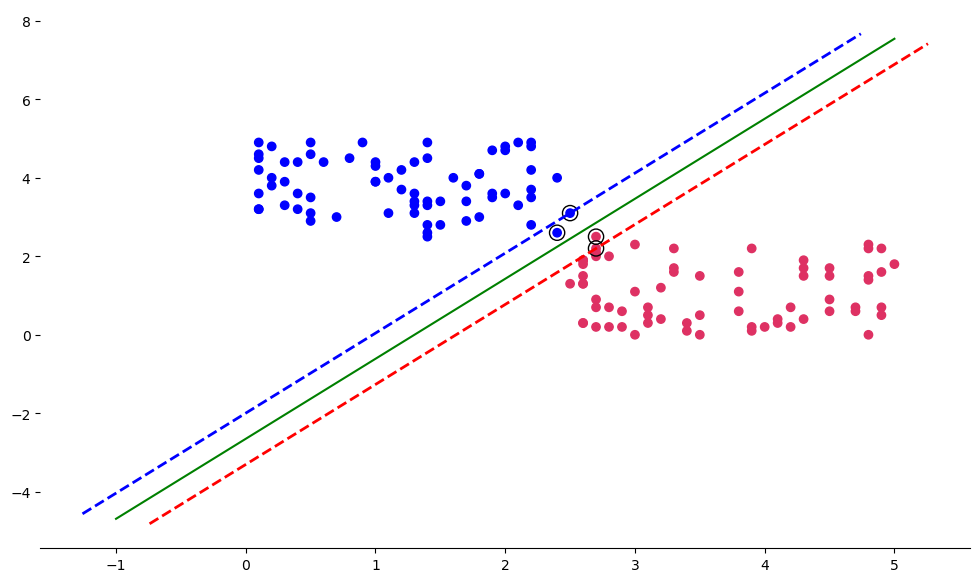

In [62]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create grid to evaluate model
xx = np.linspace(-1, max(X['X']) + 1, len(X_train))
yy = np.linspace(0, max(X['y']) + 1, len(y_train))

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#DE3163', '#0000FF')

ax.scatter(X_train['X'], X_train['y'], c=colors)
for vector in 2_svc_10.support_vectors_:
    ax.scatter(x=vector[0], y=vector[1], s=120, linewidth=1, facecolors='none', edgecolors='k')
w = 2_svc_10.coef_
b = 2_svc_10.intercept_

x = np.linspace(-1,5, 100)
y = -(w[0][0] / w[0][1])*x - b[0]/w[0][1]

ax.plot(x, y, color='green')

#plotting the margins
w_hat = w[0] / np.sqrt(np.sum(w[0] ** 2))

margin = 1 / np.sqrt(np.sum(w[0] ** 2))

decision_boundary_points = np.array(list(zip(x, y)))
points_above_plane = decision_boundary_points + w_hat * margin
points_below_plane = decision_boundary_points - w_hat * margin

plt.plot(points_above_plane[:, 0], 
         points_above_plane[:, 1], 
         'r--', 
         linewidth=2)

plt.plot(points_below_plane[:, 0], 
         points_below_plane[:, 1], 
         'b--',
         linewidth=2)

In [63]:
2_svc_100 = SVC(kernel='linear', C=100) #instance of SVM classifier with C value 100

In [64]:
2_svc_100.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [65]:
svc_predict_100 = 2_svc_100.predict(X_test)

In [66]:
print(classification_report(y_test, svc_predict_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



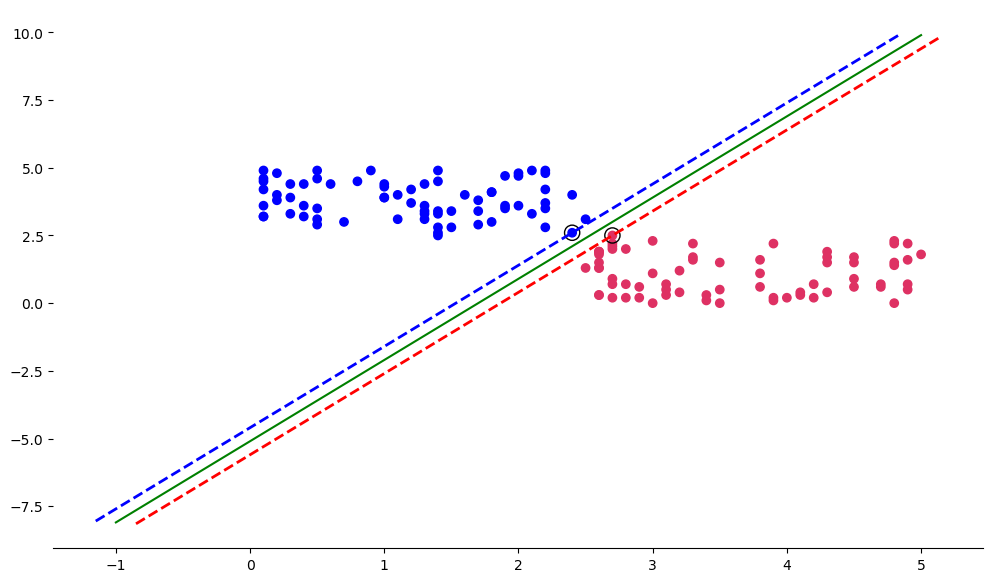

In [67]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create grid to evaluate model
xx = np.linspace(-1, max(X['X']) + 1, len(X_train))
yy = np.linspace(0, max(X['y']) + 1, len(y_train))

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#DE3163', '#0000FF')

ax.scatter(X_train['X'], X_train['y'], c=colors)
for vector in 2_svc_100.support_vectors_:
    ax.scatter(x=vector[0], y=vector[1], s=120, linewidth=1, facecolors='none', edgecolors='k')
w = 2_svc_100.coef_
b = 2_svc_100.intercept_

x = np.linspace(-1,5, 100)
y = -(w[0][0] / w[0][1])*x - b[0]/w[0][1]

ax.plot(x, y, color='green')

#plotting the margins
w_hat = w[0] / np.sqrt(np.sum(w[0] ** 2))

margin = 1 / np.sqrt(np.sum(w[0] ** 2))

decision_boundary_points = np.array(list(zip(x, y)))
points_above_plane = decision_boundary_points + w_hat * margin
points_below_plane = decision_boundary_points - w_hat * margin

plt.plot(points_above_plane[:, 0], 
         points_above_plane[:, 1], 
         'r--', 
         linewidth=2)

plt.plot(points_below_plane[:, 0], 
         points_below_plane[:, 1], 
         'b--',
         linewidth=2)

**3. Convert R code: Number of Support Vectors 2**

In [68]:
x1 = [0.5, 1, 1, 2, 3, 3.5, 1, 3.5, 4, 5, 5.5, 6]
x2 = [3.5, 1, 2.5, 2,4, 1.2, 5.8, 3, 4, 5, 4, 1]
target = [1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1]

df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'target': target
})

df

,x1,x2,target
0,0.5,3.5,1
1,1.0,1.0,1
2,1.0,2.5,1
3,2.0,2.0,1
4,3.0,4.0,1
5,3.5,1.2,1
6,1.0,5.8,-1
7,3.5,3.0,-1
8,4.0,4.0,-1
9,5.0,5.0,-1


In [94]:
svc_model_3 = SVC(kernel='linear', C=0.1)

In [70]:
X = df[['x1', 'x2']]
y = df['target']

In [71]:
svc_model_3.fit(X, y)

SVC(C=0.1, kernel='linear')

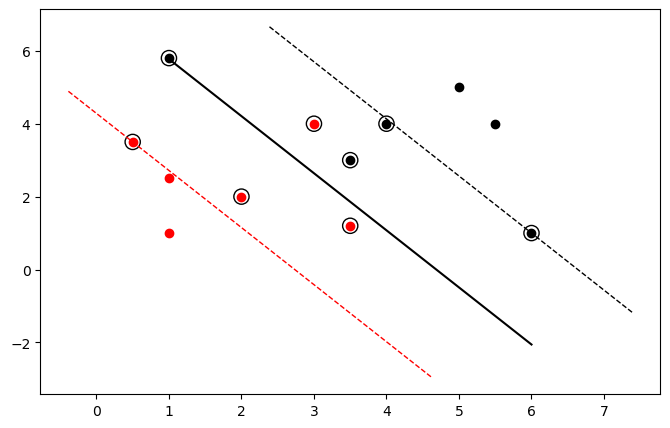

In [72]:
fig, ax = plt.subplots(figsize=(8,5))

df_targetOne = df[df.target==1]
df_targetMinusOne = df[df.target==-1]

x_pts = np.linspace(1, 6, 12)
w = svc_model_3.coef_[0]
b = svc_model_3.intercept_[0]

y_pts = -(w[0]/w[1])*x_pts - (b/w[1])

ax.scatter(x=df_targetOne['x1'], y=df_targetOne['x2'], color='red')
ax.scatter(x=df_targetMinusOne['x1'], y=df_targetMinusOne['x2'], color='black')
ax.plot(x_pts, y_pts, color='black')

for coordinate in svc_model_3.support_vectors_:
    ax.scatter(coordinate[0], coordinate[1], s=120, linewidth=1, facecolors='none', edgecolors='k')
    
#plotting the margins
w_hat = w / np.sqrt(np.sum(w ** 2))

margin = 1 / np.sqrt(np.sum(w ** 2))

decision_boundary_points = np.array(list(zip(x_pts, y_pts)))
points_above_plane = decision_boundary_points + w_hat * margin
points_below_plane = decision_boundary_points - w_hat * margin

plt.plot(points_above_plane[:, 0], 
         points_above_plane[:, 1], 
         'r--', 
         linewidth=1)

plt.plot(points_below_plane[:, 0], 
         points_below_plane[:, 1], 
         'k--',
         linewidth=1)

In [73]:
print('Number of support vectors:', len(svc_model_3.support_vectors_))

Number of support vectors: 8


**For different values of cost function**

In [74]:
svc_model_3 = SVC(kernel='linear', C=1) #C value = 1

In [75]:
X = df[['x1', 'x2']]
y = df['target']

In [76]:
svc_model_3.fit(X, y)

SVC(C=1, kernel='linear')

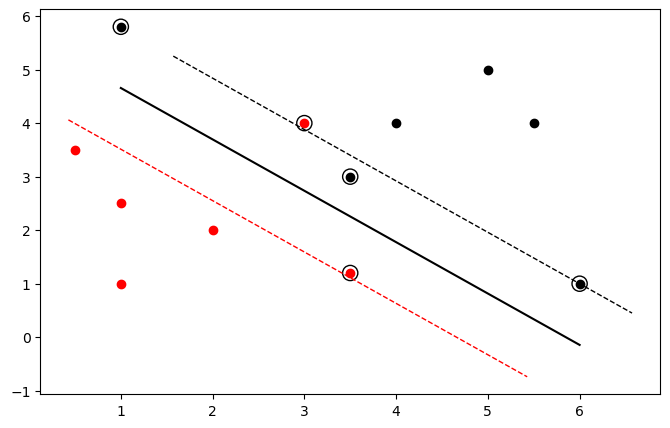

In [77]:
fig, ax = plt.subplots(figsize=(8,5))

df_targetOne = df[df.target==1]
df_targetMinusOne = df[df.target==-1]

x_pts = np.linspace(1, 6, 12)
w = svc_model_3.coef_[0]
b = svc_model_3.intercept_[0]

y_pts = -(w[0]/w[1])*x_pts - (b/w[1])

ax.scatter(x=df_targetOne['x1'], y=df_targetOne['x2'], color='red')
ax.scatter(x=df_targetMinusOne['x1'], y=df_targetMinusOne['x2'], color='black')
ax.plot(x_pts, y_pts, color='black')

for coordinate in svc_model_3.support_vectors_:
    ax.scatter(coordinate[0], coordinate[1], s=120, linewidth=1, facecolors='none', edgecolors='k')
    
#plotting the margins
w_hat = w / np.sqrt(np.sum(w ** 2))

margin = 1 / np.sqrt(np.sum(w ** 2))

decision_boundary_points = np.array(list(zip(x_pts, y_pts)))
points_above_plane = decision_boundary_points + w_hat * margin
points_below_plane = decision_boundary_points - w_hat * margin

plt.plot(points_above_plane[:, 0], 
         points_above_plane[:, 1], 
         'r--', 
         linewidth=1)

plt.plot(points_below_plane[:, 0], 
         points_below_plane[:, 1], 
         'k--',
         linewidth=1)

In [78]:
print('Number of support vectors:', len(svc_model_3.support_vectors_))

Number of support vectors: 5


In [79]:
svc_model_3 = SVC(kernel='linear', C=10) #C value = 10

In [84]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [80]:
X = df[['x1', 'x2']]
y = df['target']

In [81]:
svc_model_3.fit(X, y)

SVC(C=10, kernel='linear')

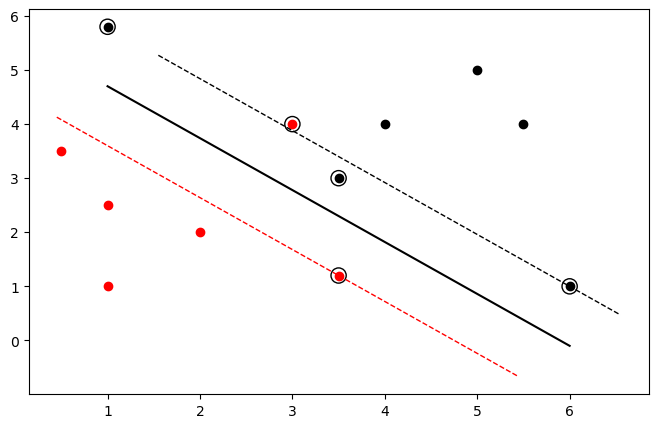

In [82]:
fig, ax = plt.subplots(figsize=(8,5))

df_targetOne = df[df.target==1]
df_targetMinusOne = df[df.target==-1]

x_pts = np.linspace(1, 6, 12)
w = svc_model_3.coef_[0]
b = svc_model_3.intercept_[0]

y_pts = -(w[0]/w[1])*x_pts - (b/w[1])

ax.scatter(x=df_targetOne['x1'], y=df_targetOne['x2'], color='red')
ax.scatter(x=df_targetMinusOne['x1'], y=df_targetMinusOne['x2'], color='black')
ax.plot(x_pts, y_pts, color='black')

for coordinate in svc_model_3.support_vectors_:
    ax.scatter(coordinate[0], coordinate[1], s=120, linewidth=1, facecolors='none', edgecolors='k')
    
#plotting the margins
w_hat = w / np.sqrt(np.sum(w ** 2))

margin = 1 / np.sqrt(np.sum(w ** 2))

decision_boundary_points = np.array(list(zip(x_pts, y_pts)))
points_above_plane = decision_boundary_points + w_hat * margin
points_below_plane = decision_boundary_points - w_hat * margin

plt.plot(points_above_plane[:, 0], 
         points_above_plane[:, 1], 
         'r--', 
         linewidth=1)

plt.plot(points_below_plane[:, 0], 
         points_below_plane[:, 1], 
         'k--',
         linewidth=1)

In [83]:
print('Number of support vectors:', len(svc_model_3.support_vectors_))

Number of support vectors: 5


If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.

Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.